In [18]:
##import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
df = pd.read_csv('12_coin_Bitcoin.csv')
print(df.shape)
df.describe()

(2991, 10)


,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [3]:
##dimensions
df.shape

(2991, 10)

In [4]:
###to check datatypes of columns -tell about features and their type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [5]:
##basic descriptive to see , count , mean , std , max
pd.set_option('display.float_format' , lambda x: '%.3f' % x)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SNo,2991.000,1496.000,863.572,1.000,748.500,1496.000,2243.500,2991.000
High,2991.000,6893.326,11642.832,74.561,436.179,2387.610,8733.927,64863.099
Low,2991.000,6486.010,10869.032,65.526,422.879,2178.500,8289.800,62208.964
Open,2991.000,6700.146,11288.044,68.505,430.445,2269.890,8569.656,63523.755
Close,2991.000,6711.290,11298.142,68.431,430.569,2286.410,8576.239,63503.458
Volume,2991.000,10906334004.867,18888952979.843,0.000,30367250.000,946035968.000,15920149610.469,350967941479.060
Marketcap,2991.000,120876059112.884,210943836987.405,778411178.875,6305579328.825,37415031060.800,149995739945.595,1186364044140.270


In [6]:
# to remove columns of open and close

df = df.drop(['SNo','Name','Symbol','Open','Close'], axis=1)


In [7]:
# finding missing values
df.isnull()

,Date,High,Low,Volume,Marketcap
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2986,False,False,False,False,False
2987,False,False,False,False,False
2988,False,False,False,False,False
2989,False,False,False,False,False


In [8]:
## which columns have missing values and to check the extenet of missing data

df.isnull().sum()/len(df)*100     ## /len(df)*100 to check percentage respective to columns count , without it gives just count of null values

Date        0.000
High        0.000
Low         0.000
Volume      0.000
Marketcap   0.000
dtype: float64

In [9]:
### how to detect missing values
#import missingno as msno

### visulaize relative missingness using bar
# msno.bar(df)
# plt.show()

## using matrix
# msno.matrix(df)
# plt.show()

### using heatmap
# msno.heatmap(df)
# plt.show


In [10]:
### check duplicates
df.duplicated().sum()

0

DATA TRANSFORMATION

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2991 non-null   object 
 1   High       2991 non-null   float64
 2   Low        2991 non-null   float64
 3   Volume     2991 non-null   float64
 4   Marketcap  2991 non-null   float64
dtypes: float64(4), object(1)
memory usage: 117.0+ KB


In [13]:
df['Target'] = ((df['High'] + df['Low'])/2)

In [14]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2991 non-null   object 
 1   High       2991 non-null   float64
 2   Low        2991 non-null   float64
 3   Volume     2991 non-null   float64
 4   Marketcap  2991 non-null   float64
 5   Target     2991 non-null   float64
dtypes: float64(5), object(1)
memory usage: 140.3+ KB


In [20]:
# Preprocess the date column
df['Date'] = pd.to_datetime(df['Date'])

In [24]:

# Split the data into training and testing sets
X = df[['High', 'Low', 'Volume', 'Marketcap']]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Apply Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict on the test set
y_pred = lr.predict(X_test)

In [29]:
# Calculate mean absolute error (MAE) and mean squared error (MSE)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)



Mean Absolute Error: 2.747949966758238e-06
Mean Squared Error: 1.9625446558541468e-11


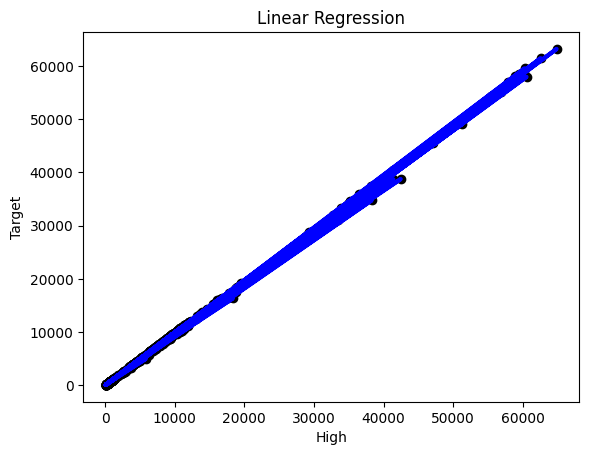

In [31]:
# Plot the linear regression line
plt.scatter(X_test['High'], y_test, color='black')
plt.plot(X_test['High'], y_pred, color='blue', linewidth=3)
plt.xlabel('High')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.show()